# 第8章　逆フィルタ処理（確認問題の解答）
コードのセルを，本文ノートブック Chap8.ipynb にコピペして実行してください。

## 8.1 逆フィルタ設計の準備
(1) 【難問】本節の (b) において，以下のような数列 $g(n)$ を取り上げた

　　n = np.array([-3, -2, -1, 0, 1, 2, 3, 4])　　　　　　　　　 # 時間軸データ（ポイント番号）を設定します，

　　gn = np.array([-0.2, 0.0, 0.8, 1.0, 0.8, 0.0, -0.2, 0.0]) 　　# 振幅データを設定します。
  
そして，「標本化した結果が $g(n)$ となるような，アナログ波形 $g(t)$」に関する周波数特性 $G(\Omega)$ を，$g(n)$ の $z$ 変換である $G(z)$ について $z = e^{j \Omega}$ を代入することにより求めた。ところで，D/A変換を学んだことのある読者は「標本化した結果が $g(n)$ となるような，アナログ波形 $g(t)$」を sinc 関数を用いて求めることができるはずである。実際に，その $g(t)$ を求めて描画しなさい。さらには，数式としてフーリエ変換することで $G(\Omega)$ を考え，見通しが立ったら値を計算して，本節で求めた $G(\Omega)$ と比較しなさい。

【答】まず，$g(n)$ の波形を描くことから始めます。

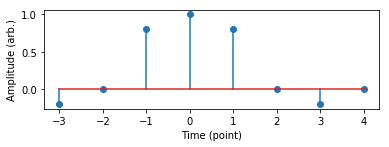

In [ ]:
n = np.array([-3, -2, -1, 0, 1, 2, 3, 4])                 # 時間軸データ（ポイント番号）を設定します，
gn = np.array([-0.2, 0.0, 0.8, 1.0, 0.8, 0.0, -0.2, 0.0]) # 振幅データを設定します。
plt.subplot(211)                                          # 図面は上下に2分割したサイズで描きます。
plot_wave(n, gn, xtitle = 'Time (point)', stem = True)    # stem = True で棒グラフ表示にします。

さて，sinc関数により補間したアナログ波形 $g(t)$ は，標本化周期を $T \ (=1/f_s)$ としたとき，次式で与えられる。
$$
g(t) = \sum_{n=-\infty}^{\infty} g(n) \ {\rm sinc} \left( \pi \frac{t-nT}{T} \right) = \sum_{n=-\infty}^{\infty} g(n) \ \frac {\sin \left( \pi \frac{t-nT}{T} \right)}{ \pi \frac{t-nT}{T}} 
$$
ここでは，話を簡単にするため， $f_s = 1$ (Hz) とする（これにより，$\Omega = \omega$ とみなせる）。また，数値があるのは $n$ について $-3$ から $4$ の範囲なので，数式を改めて書くと，以下のとおりである。
$$
g(t) = \sum_{n=-3}^{4} g(n) \ \frac {\sin \left\{ \pi (t-n) \right\}}{ \pi (t-n)} 
$$

まず，試しに $n = -3$ の場合を計算して，$g(n)$ と重ねて表示する。

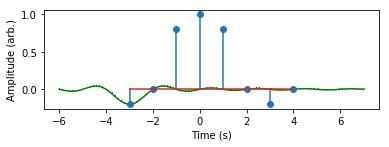

In [ ]:
testPoint = -3
t = np.linspace(-6, 7, 100)
gtest = gn[testPoint + 3] * np.sin(np.pi * (t - testPoint)) / (np.pi * (t - testPoint))

plt.subplot(211)
plot_wave(t, gtest, hold = True, color = 'g')
plot_wave(n, gn, stem = True)

[演習] testPoint を -3 から 4 まで変えて実行すると，「その点を通り，他の標本点では 0 を通る」ことを確認すること。

それが確認できたならば，全ての $n$ についての結果を加算して描いて，$g(n)$ と重ねて比較してみましょう。

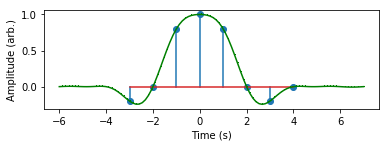

In [ ]:
gt = np.zeros(len(t))
for testPoint in n:
    gt += gn[testPoint + 3] * np.sin(np.pi * (t - testPoint)) / (np.pi * (t - testPoint))

plt.subplot(211)
plot_wave(n, gn, hold = True, stem = True)
plot_wave(t, gt, color = 'g')

「標本化した結果が $g(n)$ となるような，アナログ波形 $g(t)$」が得られたことを確認できたでしょう。

さて，sinc関数に関するフーリエ変換対は，以下のように与えられます。
$$
{\rm sinc} (\pi t) = \frac{\sin (\pi t)}{\pi t} \Leftrightarrow {\rm rect}\left( \frac{\omega}{2 \pi} \right) 
$$
ここで rect関数（矩形関数）rect($x$) は，$x$ が [-1/2, 1/2] の範囲で値 1 をとり，それ以外では 0 となります。それゆえ，上式における rect関数は$\omega$ が [$-\pi$, $\pi$]の範囲で 1 をとるので，係数$g(n)$がかかった $g(n) \ {\rm sinc}(\pi t)$ のフーリエ変換は $g(n)$ という定数になります。また，フーリエ変換の性質によって，変数$t$ が $(t-n)$ と時間推移すると，位相回転 $e^{-j n \omega}$ がつきます。以上から，sinc関数 8個（実際には3点は0であるから計算不要ですが）の和で与えられる $g(t)$ のフーリエ変換を計算することは困難ではありません。実際に計算してみた結果は，下図のとおり，7.4節(b) で求めた値と（計算誤差の違いはあるものの）一致します。 

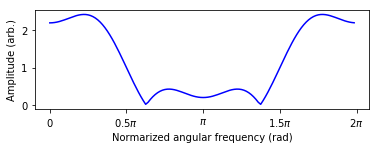

In [ ]:
omega = np.linspace(0, 2.0 * np.pi, 128, endpoint = False) # 連続的に見えるように，128 分割します。
Gomega = np.zeros(len(omega), dtype=complex)
for n0, gn0 in zip(n, gn): # 二つの配列 n と gn について同時にループを回します。
    Gomega += gn0  * np.exp(-1j * n0 * omega)
        
draw_FFT_spectrum(Gomega, fs=None, phase_spectrum = False, stem = False)

**(2)** 本節の (c) において，「0を付加して長い系列にする」ことを2通りの場合について調べた。円状シフトする 8 点の数列であれば，0系列を付加する点は 8 通り考えられ，そのうちの2通りを試していたのである。では，残り 6 通りについて (c) と同様な検討を行い，「極力 0 に近い値が続いているところに 0 を付加すると，比較的性質の良い特性を得ることができる」ことを確認しなさい。

【答】本節 (b) 末尾に示した $g_a(n)$ について，第 insertPoint 点目の後に 0 を付加して実行します。insertPoint の値を0～8で変えて実行してみてください。「0 に近い値が続いているところに　0 を付加する」の効果があることが分かります。

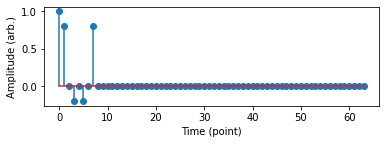

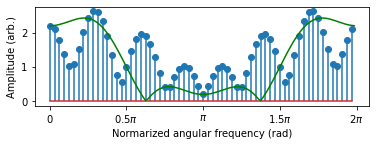

In [ ]:
insertPoint = 8
gan = np.array([1.0, 0.8, 0.0, -0.2, 0.0, -0.2, 0.0, 0.8])   # g(n) を円状シフトさせた数列をセットします。

new_len = 64                        # 0 を付加した後の信号長を 64 とします。
ga0n = np.zeros(new_len)            # とりあえず，全て 0 の系列を用意して，
for i in range(insertPoint):        # 先頭の insertPoint 個はそのまま残し
    ga0n[i] = gan[i]               
for i in range(insertPoint, 8) :   # 残りの 8 - insertPoint 個は末尾に移します。
    ga0n[new_len-(8-i)] = gan[i]

plt.subplot(211)
plot_wave([], ga0n, stem = True)

Ga0k = np.fft.fft(ga0n)                              # g_{a0}(n) の DFT を求めます。
draw_FFT_spectrum(Ga0k,   fs=None, phase_spectrum = False, hold = True)
draw_FFT_spectrum(Gomega, fs=None, phase_spectrum = False, stem = False, color ='g')

## 8.2 逆フィルタの設計法（その１：周波数領域における設計）

(1) $g(n)$ と $g_1(n)$ を直線畳み込み ($*$) した結果は，単位パルスとはならなかった。一方，それらを円状畳み込み ($\otimes$) した結果は，単位パルスになるはずである。実際に確かめなさい。これを通じて，「時間領域 $y(n) = g(n) \otimes g_1(n)$　$\Leftrightarrow$ 周波数領域 $Y(k) = G(k) \ G_1(k)$」という関係が成立することを確認しなさい。

【答】 まず，$g(n)$ と $g_1(n)$ を改めて用意します。

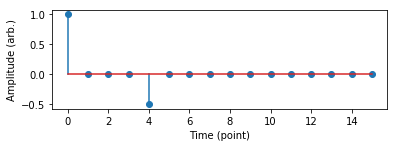

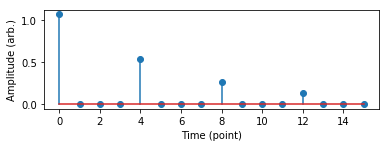

In [ ]:
gn = np.array(np.zeros(16))     # とりあえず，g(n) は全て 0 として，
gn[0] = 1.0; gn[4]= -1.0 / 2.0  # g[0] と g[4] に値をセットします。         

Gk = np.fft.fft(gn)
G1k = 1.0 / Gk                   # G(k) の逆数を求めます。
g1n = np.real(np.fft.ifft(G1k))  # その逆 DFT を求めます。

plt.subplot(211)
plot_wave([], gn, stem = True)
plt.subplot(212)
plot_wave([], g1n, stem = True)

円状畳み込みを行う関数を準備します。

In [ ]:
import sys

def circular_conv(x, h):
    ''' 円状畳み込みを行う
        引数 x: 信号
             h: フィルタ
    '''
    if (len(x) != len(h)):
        print("!!! === The lengths of the two arrays must be the same. === !!!")
        sys.exit()
        
    xc = np.copy(x)
    y = [np.dot(np.roll(xc[::-1], k+1), h) for k in np.arange(len(x))]

    return np.asarray(y)

円状畳み込みを行った結果を図示します。見事に単位パルスになります。

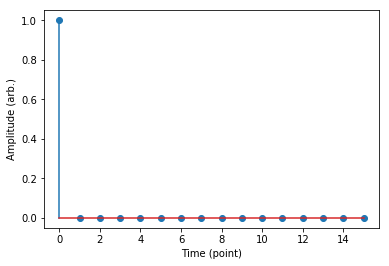

In [ ]:
plot_wave([], circular_conv(gn, g1n), stem = True)

## 8.4 実際の系に関する逆フィルタの設計
(1) 本節の 【ステップ3】インプット 8.19 において，コード中に以下のコメント行があった。

　　#以下の１行は「確認問題 (4)」で使います。  
　　#g0n = np.append( np.zeros(8192-512), np.array(gn) )   # インパルス応答の先頭部分に 7680 個の 0 を付加します。

この行のコメントを外して逆フィルタを設計した場合には，良好なフィルタは設計できない。なぜか，考えなさい。

【答】まず，このようにして求めた逆フィルタのインパルス応答 ginvn の波形をよく観察してください。これは，正しく逆フィルタを求めることができる「インパルス応答の先頭部分に 3680 個の 0 と，末尾に 4000 個の 0 を付加しまして求めたインパルス応答」を円状シフトしたものとなります。つまり，その後の処理が「円状畳み込み」であれば，何ら問題ありません。一方，その後の処理が「直線畳み込み」ですので，逆フィルタのインパルス応答が両端で 0 に収束していないと不具合が生じます。

(2) 本節では，8.2節で学んだ「周波数領域における設計」により逆フィルタを設計した。同じインパルス応答について，8.3節でで学んだ「時間領域における設計」により逆フィルタを設計しなさい。

【答】まず，512点の時系列 $g(n)$ を WAV ファイルから読み，波形と振幅スペクトルを描画します。

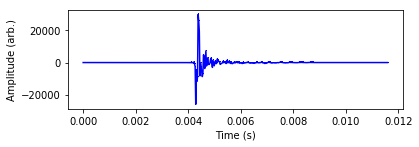

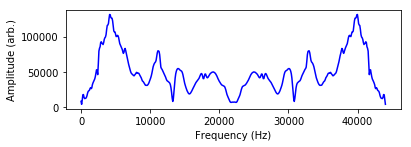

In [ ]:
import sys
import scipy.io.wavfile

fs, gn = scipy.io.wavfile.read('sample/sampleIRfile.wav') # ファイルから標本化周波数 fs と，データ gn を読み出して，
sampling_interval = 1.0 / fs                       # 標本化周期を求めて，
times = np.arange(len(gn)) * sampling_interval     # 時間軸のデータを作り，
plt.subplot(211)
plot_wave(times, gn)                               # 時間波形を描画します。点数が多いので，棒グラフではなく，折れ線グラフで表示します。

Gk = np.fft.fft(gn)                                # g(n) の DFT G(k) を求めます。
draw_FFT_spectrum(Gk, fs = fs, phase_spectrum = False, stem = False) # 点数が多いので，棒グラフではなく(stem = False)，折線グラフで表示します。

8.3節の手順に従い，逆フィルタのインパルス応答 $g_M^{-1}(0)～g_M^{-1}(M-1)$までの$M$個を求めることを，${\bf x} = [x_0, ..., x_{M-1}]$の求解により実現します。まず，フィルタ長 $M=512$とし，スパイクポイント$n_0$は仮に255番とします。

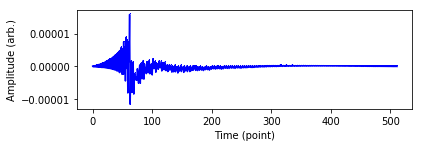

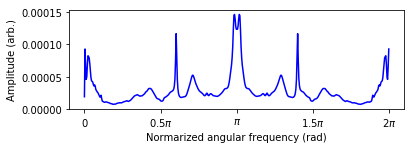

In [ ]:
# --- 準備：インパルス応答をずらしながら詰めた行列をつくる関数の定義 ---
import numpy as np
def fillIR(h, M, axis=None):
    """
    畳み込みの準備のため「インパルス応答を，ずらしながら詰めた行列」を構成する関数
    
    h: インパルス応答 (np.array)
    M: 逆フィルタのタップ長 (Integer)
    """
    K = len(h)   # インパルス応答(IR)の長さ
    N = K + M -1 # IR と逆フィルタを直線畳み込みした長さ
    A = np.zeros((N, M))
    for j in range(0, M):
        for i in range(0, K):
            A[i+j, j] = h[i] 

    return A

# --- ここから逆フィルタの求解 ---
M = 512            # 逆フィルタのタップ長を 512 として
n0 = 255           # スパイクポイントを 255 番とする
K = len(gn)        # インパルス応答(IR)の長さ
N = K + M -1       # IR と逆フィルタを直線畳み込みした長さ

A= fillIR(gn, M)  # 観測方程式の係数行列を構成する
d = np.zeros(N); d[n0] = 1.0 # 定数ベクトルを構成する

x = np.dot(np.linalg.pinv(A), d.T) # d.Tで d を転置した列ベクトルを作り，pinv (pseudo inverse，擬似逆) を利用して求解する
Ginvk = np.abs(np.fft.fft(x))
#plot_wave([], x, stem = True)
plt.subplot(211)
plot_wave([], x, stem = False)
draw_FFT_spectrum(Ginvk, fs = None, phase_spectrum = False, stem = False)

求めた逆フィルタの特性を評価するために，$g(n)$と直線畳み込みしてみましょう。

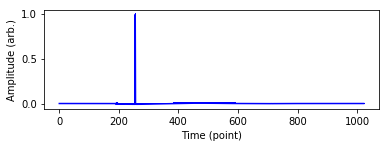

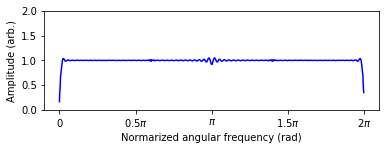

In [ ]:
yinvn = np.convolve(gn, x)        
plt.subplot(211)
plot_wave([], yinvn, stem = False)

Yinvk = np.fft.fft(yinvn)                      # g(n) の DFT G(k) を求めます。
draw_FFT_spectrum(Yinvk, fs = None, phase_spectrum = False, \
               stem = False, hold = True)     # y軸の範囲を調整するために，hold = True で描画を先延ばしして，
plt.ylim(0, 2)                                # Y軸の描画範囲を 0～2 とします。
plt.show()

キレイな逆フィルタは求められましたか？ここで仮に決めた $n_0=255$ を，例えば $0$ や $200$ に変えて実行してみてください。随分と結果が異なるでしょう。このことから，スパイクポイントの選定は重要であることが分かります（著者の知る限りは，スパイクポイントは試行錯誤的に定めるしかないようです）。

さて，フィルタ長 $M=2048$, スパイクポイント$n_0 = 1024$ とすると，いかがでしょう。かなり，良好な逆フィルタになっているでしょう。このように時間領域で設計する方が，逆フィルタのタップ長を抑えることができる可能性があります。実際の系を対象として逆フィルタを設計する場合には，どの設計法を採用するかも十分に検討してください。

最後に，$M=4096$として実行しましょう（著者の環境では実行に1分弱かかりました）。ますます良好な逆フィルタが得られるでしょう。さらに時間に余裕があったら，$M = 8096$として，その上でスパイクポイントを変えるなど，試してみてください（ただし，極めて長い実行時間がかかることにご注意ください。著者の環境では約10分かかりました）。 